#    Imporation des librairies

In [41]:
import pandas as pd 
from sqlalchemy import create_engine
import json
from jinja2 import Template 
from jinja2 import Environment, FileSystemLoader
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Connection avec la Base De Données

In [48]:
fichierConfig = "../../bdd/config.json"

with open(fichierConfig) as fichier:
    config = json.load(fichier)["mysql"]
    
engine = create_engine('mysql+' + config["connector"] + '://' + config["user"] + ":" + config["password"] + "@" + config["host"] + ":" + config["port"] + "/" + config["bdd"], echo=True)

# Test connection

In [43]:
pd.read_sql_query("select * from collecteur;", engine)

2020-10-18 23:09:01,060 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2020-10-18 23:09:01,061 INFO sqlalchemy.engine.base.Engine {}
2020-10-18 23:09:01,065 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2020-10-18 23:09:01,066 INFO sqlalchemy.engine.base.Engine {}
2020-10-18 23:09:01,069 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2020-10-18 23:09:01,070 INFO sqlalchemy.engine.base.Engine {}
2020-10-18 23:09:01,072 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8mb4' and `Collation` = 'utf8mb4_bin'
2020-10-18 23:09:01,073 INFO sqlalchemy.engine.base.Engine {}
2020-10-18 23:09:01,076 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2020-10-18 23:09:01,077 INFO sqlalchemy.engine.base.Engine {}
2020-10-18 23:09:01,080 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2020-10-18 23:09:01,081 INFO sqlalchemy.engine.base.E

,objectid,id,volume,quantite,dateInstallation,adresse,adresseComplement,codeInsee,observations,createur,dateCreation,modificateur,dateModification,globalid,_x,_y,idCategorie,idTri,idMarque
0,1,None,660.0,1,None,Gare tsm,None,06138,None,chpayet,2019-12-04 08:39:17,chpayet,2019-12-04 08:39:17,{5C455C7F-2CAF-4B57-8B69-686691E7ACAA},6.93701,43.5133,1.0,1,1.0
1,2,None,660.0,3,None,Résidence les terrasses de saint honorat,None,06138,None,chpayet,2020-01-02 13:19:48,chpayet,2020-01-02 13:19:48,{449AE0D0-B256-49C2-84F7-87F4248CA3CC},6.94152,43.4905,1.0,1,1.0
2,3,None,660.0,1,None,Prince des iles,None,06138,None,chpayet,2019-12-04 08:46:30,chpayet,2019-12-04 08:46:30,{FED2233C-9710-40F1-ACF4-58134F0BB9FE},6.93740,43.5092,2.0,1,1.0
3,4,None,660.0,1,None,Avenue de lerins trottoir de l eglise,None,06138,None,chpayet,2019-12-04 08:53:06,chpayet,2019-12-04 08:53:06,{058DC0AE-423C-4FEB-8D30-D4C113428CD8},6.93835,43.5081,2.0,1,1.0
4,5,None,660.0,1,None,Avenue de lerins angle traverse magasin souvenirs,None,06138,None,chpayet,2019-12-04 09:00:36,chpayet,2019-12-04 09:00:36,{53D62EB0-B046-4D5D-B636-94646AC984AA},6.94056,43.5077,2.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,963,None,NaN,1,None,1102 avenue du maréchal juin,None,06085,None,chpayet,2020-04-17 09:11:49,chpayet,2020-07-27 09:34:53,{9CD34D6C-3542-4109-82C2-C02A0340B019},6.99393,43.5914,NaN,5,NaN
963,964,None,NaN,1,None,Chemin de la plaine,None,06085,None,chpayet,2020-07-27 12:18:01,chpayet,2020-07-27 12:18:01,{EF825DB5-6E4C-41FE-98B1-A1D910135369},6.97030,43.6022,NaN,5,NaN
964,965,None,NaN,1,None,Chemin du refuge,None,06085,None,chpayet,2020-07-27 12:35:03,chpayet,2020-07-27 12:35:03,{D84F19EA-875D-4778-B290-F634F6C4514A},6.99238,43.5810,NaN,5,NaN
965,966,None,NaN,3,None,Avenue lamartine,None,06085,None,chpayet,2020-03-10 09:59:22,chpayet,2020-07-27 12:39:49,{EFBAFBA0-0480-4340-B500-F47140DB6A2F},6.98499,43.5744,NaN,5,NaN


# Fonction pour générer les graphiques
### champs à renseigner:
    - nom du DataFrame
    - nom de la colonne des abscisses
    - nom de la colonne des ordonnées
    - titre du graphique
    - titre de l'axe des abscisses
    - titre de l'axe des ordonnées
    - chemin and name fig

In [27]:
def graph(DataFrame, colonne1, colonne2,  titre, xlabel, ylabel, savefig):    
    plt.figure(figsize = [7,5])
    plt.subplot(111)
    plt.plot(DataFrame[colonne1],DataFrame[colonne2])
    plt.title("{}".format(titre))
    plt.xlabel("{}".format(xlabel))
    plt.ylabel("{}".format(ylabel))
    plt.savefig(savefig, dpi = 50, format = "png")
    plt.show()
    plt.close()

# Lecture du fichier html et ecriture via Jinja2

In [51]:

TMPL_DIR = "../html_css"
fichier = "cliiink.html"
templateLoader = FileSystemLoader(searchpath=TMPL_DIR)
templateEnv = Environment(loader = templateLoader)
template = templateEnv.get_template(fichier)
data ={
    'time_stamp':datetime.datetime.now().strftime("%x %X"),
    'config':config
}
print(template.render(data))
outputText = template.render(data)
html_file = open('../html_css/cliiink1.html', 'w')
html_file.write(outputText)
html_file.close()


<!DOCTYPE html>
<html>

	<head>
		<meta charset="utf-8">
		<link rel="stylesheet" type="text/css" href="cliiink.css">
		<title>Cliink</title>
	</head>
	
	<body>
		<header>
			<ul id="logos">
				<li id="logo_cliiink"><p>Project_Dashboard_Cliiink</p></li>						
				<li id="identifiant"><p>FERNANDES Stephane</p></li>
				<li id="logo_user"></li>
			</ul>
		</header>

		<h1>Tableau de bord Cliiink</h1>

		<div id="texte_intro">
			<h2>Texte d'introduction:</h2>
			<p>hjsbdhgsbdv hvdshqvc hvcnb hjhqsc cvgcnq c,hc qshvcjh cbvhdjcv</p>
		</div>

		<div id="graphique">
			<div id="graph_1">
				<img class="effet_1" src="../graphs_et_images/graph_1.png" alt="graph_1">
				<p class="effet_12">Description du graph principal</p>				
			</div>
			<div id="graph_2">
				<div>
					<img class="effet_1" src="../graphs_et_images/graph_1.png" alt="graph_1">
					<p class="effet_12">Description du deuxieme graph</p>
				</div>
				<div>
					<img class="effet_1" src="../graphs_et_images/graph_1.png" alt

In [34]:
df = pd.read_sql("select * from collecteur;", engine)

2020-10-16 20:21:43,923 INFO sqlalchemy.engine.base.Engine DESCRIBE `select * from collecteur;`
2020-10-16 20:21:43,929 INFO sqlalchemy.engine.base.Engine {}
2020-10-16 20:21:43,931 INFO sqlalchemy.engine.base.Engine ROLLBACK
2020-10-16 20:21:43,935 INFO sqlalchemy.engine.base.Engine select * from collecteur;
2020-10-16 20:21:43,937 INFO sqlalchemy.engine.base.Engine {}


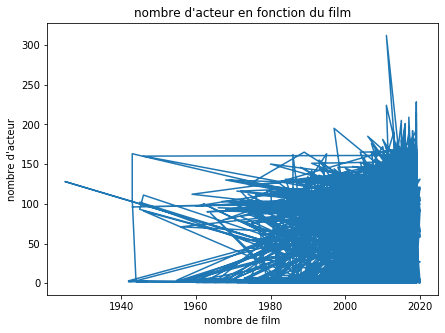

'\ngraph(df, \'duration\', "nombre de films en fonction de leurs durer", "nombre de films", "durer des films", "../graph/categorie1.png")\ngraph(df, \'duration\', "nombre de films en fonction de leurs durer", "nombre de films", "durer des films", "../graph/categorie2.png")\n'

In [30]:
graph(df, 'release_year', 'duration', "nombre d'acteur en fonction du film", "nombre de film", "nombre d'acteur", "../graph/categorie_A.png")
"""
graph(df, 'duration', "nombre de films en fonction de leurs durer", "nombre de films", "durer des films", "../graph/categorie1.png")
graph(df, 'duration', "nombre de films en fonction de leurs durer", "nombre de films", "durer des films", "../graph/categorie2.png")
"""

In [10]:
df

,show_id,type,title,date_added,release_year,rating,duration,description
0,247747,Movie,Amar Akbar Anthony,2019-12-31,2019-01-01,TV-14,172,"Abandoned in a park by their father, Amar, Akb..."
1,269880,Movie,Bad Boys,2019-10-01,2016-01-01,R,119,"In this fast-paced actioner, two Miami narcoti..."
2,281550,Movie,La Bamba,2020-01-01,2013-01-01,PG-13,109,The plane crash that killed Buddy Holly also t...
3,284890,Movie,Barsaat,2018-04-01,2016-01-01,TV-PG,166,A naïve young man and a rich city girl fall in...
4,292118,Movie,Beavis and Butt-head Do America,2019-11-20,2017-01-01,PG-13,81,"After realizing that their boob tube is gone, ..."
...,...,...,...,...,...,...,...,...
6229,81224868,TV Show,Robot Trains,2019-12-31,2015-01-01,TV-Y7,2,Keeping peace and safety in Train World is no ...
6230,81227195,Movie,Kalushi: The Story of Solomon Mahlangu,2019-11-29,2016-01-01,TV-MA,107,The life and times of iconic South African lib...
6231,81228864,Movie,Blitz Patrollie,2019-12-27,2016-01-01,TV-MA,102,Caught between family pressures and small-time...
6232,81235603,TV Show,Sym-Bionic Titan,2019-12-15,2013-01-01,TV-PG,1,"Aliens fleeing their planet land on Earth, pos..."


In [33]:
def graph(graph, DataFrame, colonne1, colonne2,  titre, xlabel, ylabel, savefig):    
    plt.figure(figsize = [7,5])
    plt.subplot(111)
    #"{}".format(graph)
    plt.plot(DataFrame[colonne1],DataFrame[colonne2])
    plt.title("{}".format(titre))
    plt.xlabel("{}".format(xlabel))
    plt.ylabel("{}".format(ylabel))
    plt.savefig(savefig, dpi = 50, format = "png")
    plt.show()
    plt.close()

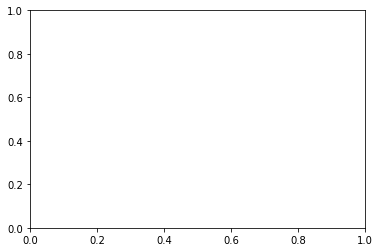

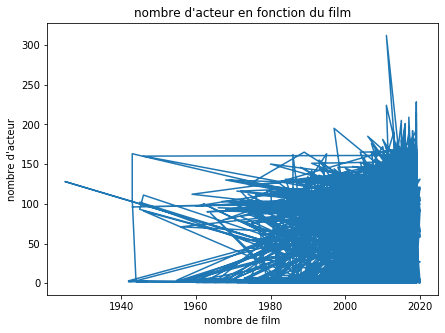

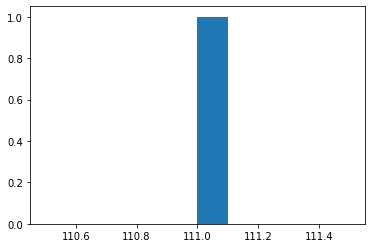

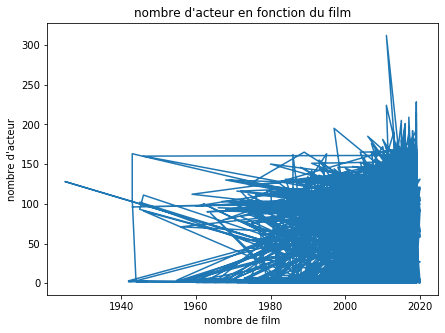

In [35]:
graph(plt.subplot(111), df, 'release_year', 'duration', "nombre d'acteur en fonction du film", "nombre de film", "nombre d'acteur", "../graph/categorie_A.png")

graph(plt.hist(111), df, 'release_year', 'duration', "nombre d'acteur en fonction du film", "nombre de film", "nombre d'acteur", "../graph/categorie_A.png")


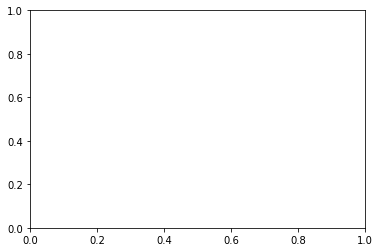

In [31]:
plt.subplot(111)

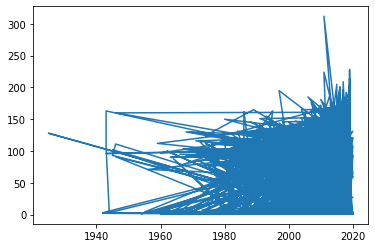

In [36]:
plt.plot(df['release_year'], df['duration'])

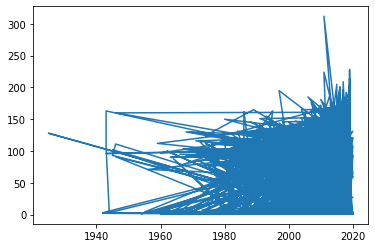

In [42]:
#plt.hist(111)
plt.plot(df['release_year'], df['duration'])

ValueError: `bins` must increase monotonically, when an array

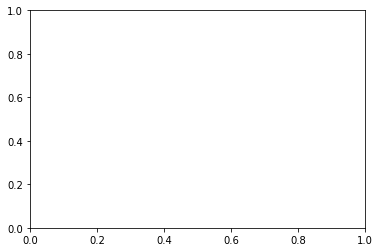

In [51]:
plt.hist(df['nombre'], df['duration'])

In [50]:
df =pd.read_sql("SELECT Di.director, Ca.title, COUNT(A.cast) AS nombre, Ca.duration FROM Directors AS Di JOIN directors_catalogue AS DC ON Di.di_id = DC.di_id_fk JOIN catalogue AS Ca ON DC.show_id_fk = Ca.show_id JOIN catalogue_actor AS C_A ON Ca.show_id = C_A.show_id_fk JOIN Actor AS A ON C_A.A_id_fk = A.A_id WHERE Di.director = '%s' GROUP BY Di.director, Ca.title, Ca.duration;"%('Don Michael Paul'),engine)

In [ ]:
# x, bins, range, density, weights, cumulative, bottom, histtype, align, orientation, rwidth, log, color, label, stacked, normed, data

([array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0.])],
 array([  8. ,  18.3,  28.6,  38.9,  49.2,  59.5,  69.8,  80.1,  90.4,
        100.7, 111. ]),
 <a list of 6 Lists of Patches objects>)

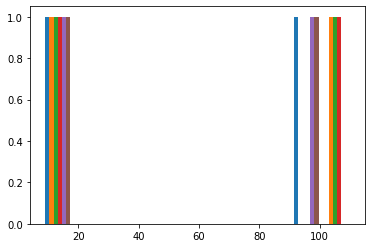

In [105]:
plt.hist(df2[["nombre",'duration']])

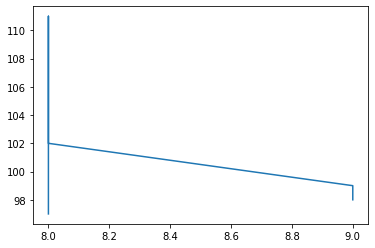

In [68]:
plt.plot(df2["nombre"], df2['duration'])

In [59]:
df2 = df[["nombre", "duration"]]

In [60]:
df2

,nombre,duration
0,8,97
1,8,111
2,8,103
3,8,102
4,9,99
5,9,98


In [57]:
df 

,director,title,nombre,duration
0,Don Michael Paul,Bulletproof 2,8,97
1,Don Michael Paul,Death Race: Beyond Anarchy,8,111
2,Don Michael Paul,Jarhead: Law of Return,8,103
3,Don Michael Paul,Scorpion King 5: Book of Souls,8,102
4,Don Michael Paul,Tremors 5: Bloodline,9,99
5,Don Michael Paul,Tremors 6: A Cold Day in Hell,9,98


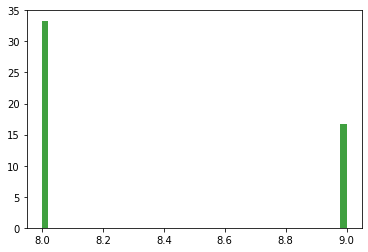

In [93]:
import numpy as np
import matplotlib.pyplot as plt


x = df['nombre']
# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)
plt.show()

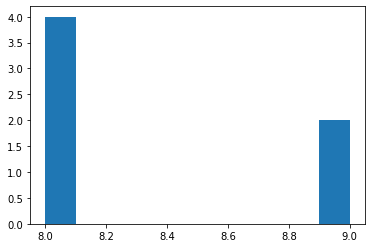

In [104]:
x = df['nombre']
# the histogram of the data
n, bins, patches = plt.hist(x )
plt.show()

(array([2., 1., 0., 1., 1., 0., 0., 0., 0., 1.]),
 array([ 97. ,  98.4,  99.8, 101.2, 102.6, 104. , 105.4, 106.8, 108.2,
        109.6, 111. ]),
 <a list of 10 Patch objects>)

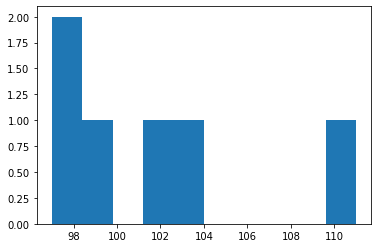

In [121]:
plt.hist(df["duration"], 10)

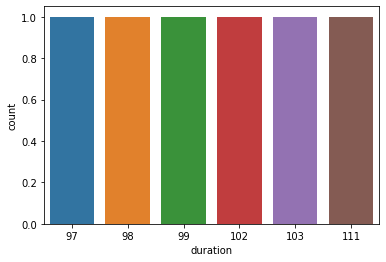

In [126]:
sns.countplot(x = "duration",data= df)

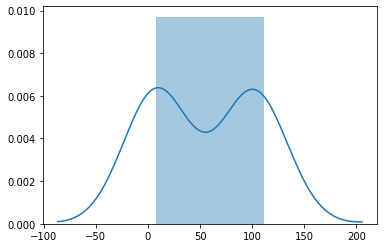

In [128]:
sns.distplot(df2)

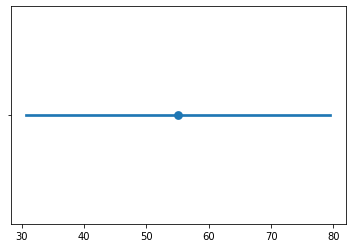

In [130]:
sns.pointplot(df2)

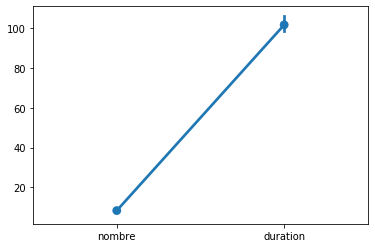

In [151]:
sns.pointplot(data = df)

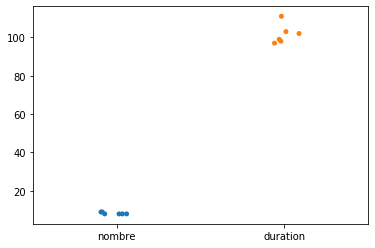

In [149]:
sns.stripplot(data= df)

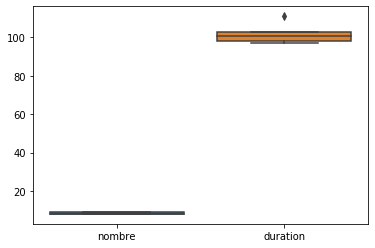

In [147]:
sns.boxplot(data= df)

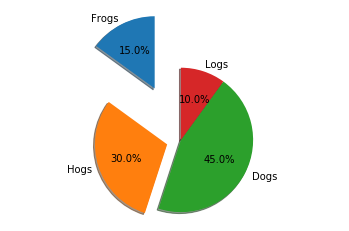

In [1]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0.8, 0.2, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

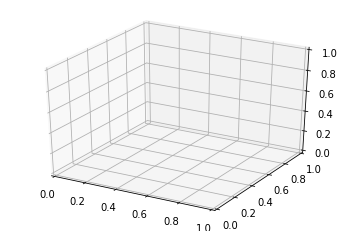

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

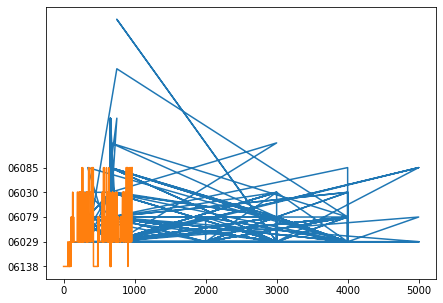

In [39]:
    
    plt.figure(figsize = [7,5])
    ax = fig.add_subplot(111, projection='3d')
    plt.plot(df['volume'],df["quantite"], df["codeInsee"])

    
    plt.show()
    plt.close()

In [ ]:
    
    plt.figure(figsize = [7,5])
    plt.subplot(111)
    plt.plot(df['volume'],df["quantite"])

    
    plt.show()
    plt.close()

In [35]:
df

,objectid,id,volume,quantite,dateInstallation,adresse,adresseComplement,codeInsee,observations,createur,dateCreation,modificateur,dateModification,globalid,_x,_y,idCategorie,idTri,idMarque
0,1,None,660.0,1,None,Gare tsm,None,06138,None,chpayet,2019-12-04 08:39:17,chpayet,2019-12-04 08:39:17,{5C455C7F-2CAF-4B57-8B69-686691E7ACAA},6.93701,43.5133,1.0,1,1.0
1,2,None,660.0,3,None,Résidence les terrasses de saint honorat,None,06138,None,chpayet,2020-01-02 13:19:48,chpayet,2020-01-02 13:19:48,{449AE0D0-B256-49C2-84F7-87F4248CA3CC},6.94152,43.4905,1.0,1,1.0
2,3,None,660.0,1,None,Prince des iles,None,06138,None,chpayet,2019-12-04 08:46:30,chpayet,2019-12-04 08:46:30,{FED2233C-9710-40F1-ACF4-58134F0BB9FE},6.93740,43.5092,2.0,1,1.0
3,4,None,660.0,1,None,Avenue de lerins trottoir de l eglise,None,06138,None,chpayet,2019-12-04 08:53:06,chpayet,2019-12-04 08:53:06,{058DC0AE-423C-4FEB-8D30-D4C113428CD8},6.93835,43.5081,2.0,1,1.0
4,5,None,660.0,1,None,Avenue de lerins angle traverse magasin souvenirs,None,06138,None,chpayet,2019-12-04 09:00:36,chpayet,2019-12-04 09:00:36,{53D62EB0-B046-4D5D-B636-94646AC984AA},6.94056,43.5077,2.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,963,None,NaN,1,None,1102 avenue du maréchal juin,None,06085,None,chpayet,2020-04-17 09:11:49,chpayet,2020-07-27 09:34:53,{9CD34D6C-3542-4109-82C2-C02A0340B019},6.99393,43.5914,NaN,5,NaN
963,964,None,NaN,1,None,Chemin de la plaine,None,06085,None,chpayet,2020-07-27 12:18:01,chpayet,2020-07-27 12:18:01,{EF825DB5-6E4C-41FE-98B1-A1D910135369},6.97030,43.6022,NaN,5,NaN
964,965,None,NaN,1,None,Chemin du refuge,None,06085,None,chpayet,2020-07-27 12:35:03,chpayet,2020-07-27 12:35:03,{D84F19EA-875D-4778-B290-F634F6C4514A},6.99238,43.5810,NaN,5,NaN
965,966,None,NaN,3,None,Avenue lamartine,None,06085,None,chpayet,2020-03-10 09:59:22,chpayet,2020-07-27 12:39:49,{EFBAFBA0-0480-4340-B500-F47140DB6A2F},6.98499,43.5744,NaN,5,NaN
